In [1]:
# This notebook was written for Python 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.font_manager as fm
from scipy import stats

%matplotlib inline

In [2]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
pinkgreens = sns.color_palette('PiYG', 9)
grays = sns.color_palette('Greys', 9)

bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 8.0, 'xtick.minor.size': 5.0, 'xtick.major.width': 3.0, 
      'xtick.minor.width': 3.0, 'ytick.minor.width' : 3.0, 'ytick.major.width': 3.0,
      'ytick.major.size': 8.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 3.0}

In [3]:
bw_black = {'axis.labelcolor': 'black', 'xtick.color': 'black', 'ytick.color': 'black',
     'grid.color': 'black', 'axes.edgecolor': 'black', 'axes.facecolor': 'white',
     'text.color': 'black', 'axes.labelcolor': 'black', 'figure.facecolor' : 'white',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}

In [4]:
bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

## Import from .csv files

In [5]:
df_N = pd.DataFrame()

for i in range(11, 16):
    sub = pd.read_csv('raw/cellcounts/2016_02_09_s' + str(i) + '.csv')
    sub = sub.iloc[:25, :]
    df_N['0209_s' + (str(i))] = sub['Type 2']
    
for i in range(11, 16):
    sub = pd.read_csv('raw/cellcounts/2016_02_11_s' + str(i) + '.csv')
    sub = sub.iloc[:25, :]
    df_N['0211_s' + (str(i))] = sub['Type 2']
    
for i in range(11, 16):
    sub = pd.read_csv('raw/cellcounts/2016_02_15_s' + str(i) + '.csv')
    sub = sub.iloc[:25, :]
    df_N['0215_s' + (str(i))] = sub['Type 2']

In [6]:
df_C = pd.DataFrame()

for i in range(16, 21):
    sub = pd.read_csv('raw/cellcounts/2016_02_09_s' + str(i) + '.csv')
    sub = sub.iloc[:53, :]
    df_C['0209_s' + str(i)] = sub['Type 2']

for i in range(16, 21):
    sub = pd.read_csv('raw/cellcounts/2016_02_11_s' + str(i) + '.csv')
    sub = sub.iloc[:53, :]
    df_C['0211_s' + str(i)] = sub['Type 2']

for i in range(16, 21):
    sub = pd.read_csv('raw/cellcounts/2016_02_15_s' + str(i) + '.csv')
    sub = sub.iloc[:53, :]
    df_C['0215_s' + str(i)] = sub['Type 2']

In [7]:
fullcounts_C = df_C.sum(axis = 1)
fullcounts_N = df_N.sum(axis = 1)

In [8]:
times_53 = np.arange(-60, (53-4)*15, 15)
times_25 = np.arange(-60, (25-4)*15, 15)

In [9]:
times_25

array([-60, -45, -30, -15,   0,  15,  30,  45,  60,  75,  90, 105, 120,
       135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300])

In [10]:
fullcounts_C_zeroed = fullcounts_C - fullcounts_C[0]

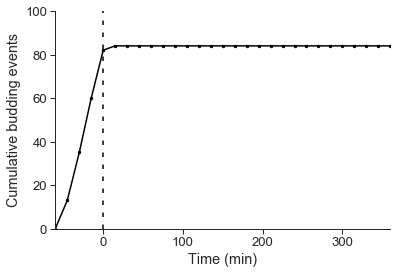

In [11]:
sns.set_context('paper', font_scale = 1.5, rc = {'lines.linewidth': 1.5})
sns.set_style('ticks')

f, ax = plt.subplots()
plt.plot(times_53, fullcounts_C_zeroed, marker = '.', color = 'black')

plt.axvline(x = 0, color = 'black', linestyle = (0, (3,5)))

ax.set_xlabel('Time (min)')
ax.set_ylabel('Cumulative budding events')

#ax.set_yscale('log', basey = 2)

ax.set_xlim(-60, 360)
ax.set_ylim(0, 100)


sns.despine()

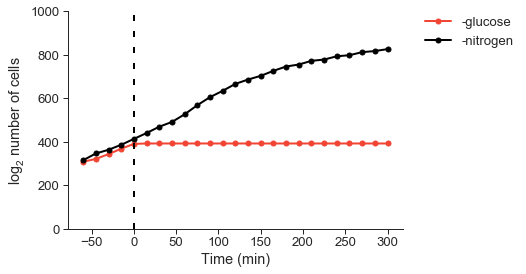

In [12]:
sns.set_context('paper', font_scale = 1.5, rc = {'lines.linewidth': 2.0})
sns.set_style('ticks')

f, ax = plt.subplots()
plt.plot(times_25, fullcounts_C[:25], marker = '.', markersize = 10, color = reds[5], label = '-glucose')
plt.plot(times_25, fullcounts_N[:25], marker = '.', markersize = 10, color = 'black', label = '-nitrogen')



plt.axvline(x = 0, color = 'black', linestyle = (0, (3,5)))

ax.set_xlabel('Time (min)')
ax.set_ylabel('$\mathregular{log_{2}}$ number of cells')

ax.set_xlim
ax.set_ylim(0, 1000)

ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0, frameon = False);

sns.despine()